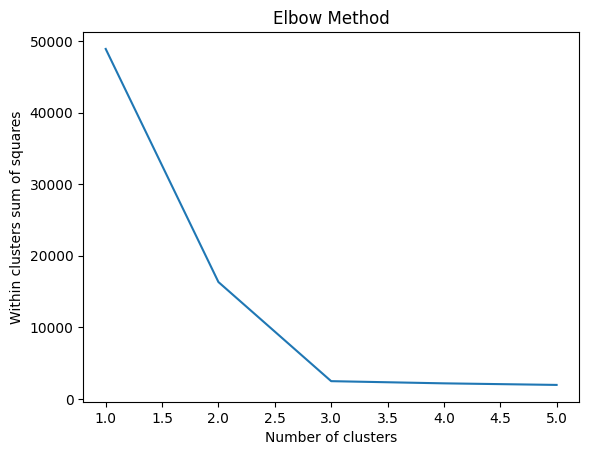


The optimal number of clusters (k) corresponding to the elbow point = 3

Distances between centroids:
Distance between Centroid 1 and Centroid 2: 24.969670633907217 units
Distance between Centroid 1 and Centroid 3: 26.075866303439494 units
Distance between Centroid 2 and Centroid 3: 44.158775128406916 units


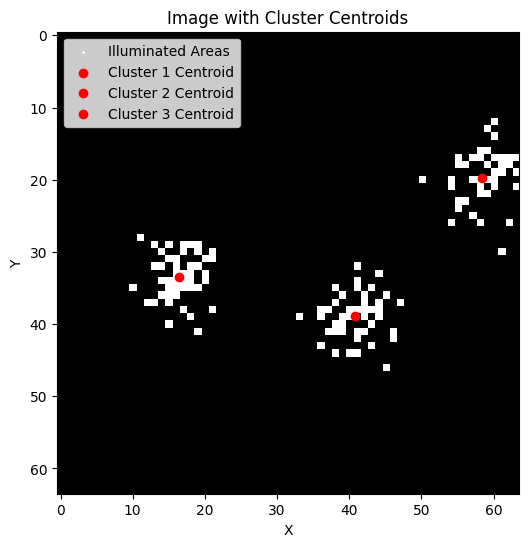

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

def read_image(filepath):
    
    img = Image.open(filepath).convert('L')  # Convert to grayscale
    image = np.array(img)   # obtain image as a Numpy array
    return image

def extract_coordinates(image):

    #Extract coordinates of illuminated areas (white dots) from image.
    
    coordinates = np.argwhere(image)
    return coordinates

def euclidean_distance(point1, point2):
    
    #Calculate the Euclidean distance between two points.
    
    return np.sqrt(np.sum((point1 - point2) ** 2))

def k_means_clustering(coordinates, num_clusters, max_iterations=1000000):
    
    # Randomly initialize centroids
    centroids = coordinates[np.random.choice(coordinates.shape[0], size=num_clusters, replace=False)]
    
    for _ in range(max_iterations):
        # Assign each point to the nearest centroid
        distances = np.sqrt(np.sum((coordinates[:, None] - centroids) ** 2,axis=2))
        labels = np.argmin(distances,axis=1)
        
        # Update centroids
        new_centroids = np.array([coordinates[labels == k].mean(axis=0) for k in range(num_clusters)])
        
        # Checking convergence
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    
    return centroids, labels

def calculate_distances(centroids):
    """
    Calculate distances between centroids.
    """
    num_centroids = len(centroids)
    distances = np.zeros((num_centroids, num_centroids))#initialising distance matrix
    
    for i in range(num_centroids):
        for j in range(i+1, num_centroids):
            distances[i, j] = euclidean_distance(centroids[i], centroids[j])
            distances[j, i] = distances[i, j]  # Distance matrix is symmetric
    
    return distances

def calculate_wcss(data, centroids, labels):
    wcss = ((data - centroids[labels])**2).sum()#wccs=within clusters sum of squares
    return wcss

def find_optimal_clusters(data, max_clusters):
    wcss = []

    for k in range(1, max_clusters + 1):
        centroids, labels = k_means_clustering(coordinates, k)
        wcss.append(calculate_wcss(coordinates, centroids, labels))

    # Plot the WCSS values against the number of clusters
    plt.plot(range(1, max_clusters + 1), wcss)
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('Within clusters sum of squares')
    plt.show()

    # Find the elbow point
    diff = np.diff(wcss)
    diff_r = diff[1:] / diff[:-1]
    return np.argmin(diff_r) + 2
  

# Read the image and convert it to binary format
image_filepath = "1.png"
binary_image = read_image(image_filepath)

# Extract coordinates of illuminated areas
coordinates = extract_coordinates(binary_image)

# Perform K-means clustering
num_clusters = find_optimal_clusters(coordinates,5) # Change as needed
print("\nThe optimal number of clusters (k) corresponding to the elbow point =",num_clusters)
centroids, labels = k_means_clustering(coordinates, num_clusters)

# Plot the image with cluster centroids
plt.figure(figsize=(8, 6))
plt.imshow(binary_image, cmap='gray')

# Plot illuminated areas
plt.scatter(coordinates[:, 1], coordinates[:, 0], color='white', s=1, label='Illuminated Areas')

# Plot cluster centroids
for i, centroid in enumerate(centroids):
    plt.scatter(centroid[1], centroid[0], color='red', marker="o", label=f'Cluster {i+1} Centroid')

# Calculate distances between centroids
distances = calculate_distances(centroids)


# Print distances in a table format
print("\nDistances between centroids:")
for i in range(num_clusters):
    for j in range(num_clusters):
        if(i!=j and i<j):print(f"Distance between Centroid {i+1} and Centroid {j+1}: {distances[i][j]} units")

plt.title('Image with Cluster Centroids')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()